In [2]:
import torch
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
from astropy.timeseries import LombScargle
import lightkurve as lk
import pandas as pd
from tqdm import tqdm
import zarr

In [3]:
df = pd.read_csv("exofop_tess_tois.csv")
df = df[["TIC ID","TOI","Period (days)","Period error"]].dropna()
df = df.rename(columns={"Period (days)" : "period", "Period error" : "error", "TOI" : "id", "TIC ID" : "TIC"})
df["id"] = [int(str(n).split(".")[1])-1 for n in df["id"]]
df["TIC"] = ["TIC " + str(n) for n in df["TIC"].to_numpy(np.int32)]
max_planets = df["id"].max()

In [4]:
len(df)

7248

In [ ]:
for i, name in tqdm(enumerate(df["TIC"].unique())):
    try:
        result = lk.search_lightcurve(name, mission="TESS")
        result = result[result.author == "TESS-SPOC"]
        result = result[result.exptime == result.exptime.max()]
        curve = result[0].download().to_pandas()
        curve["time"] = curve.index.to_numpy()
        curve.index = np.arange(len(curve))
        curve = curve[["time","flux","flux_err","quality"]]
        #curve = curve.drop(curve[curve["quality"] != 0].index)
        curve = curve.dropna()
        flux = curve[["time","flux","flux_err","quality"]].to_numpy(np.float32)
        idx = name.split(" ")[1]
        zarr.save(f"tess/{idx}.zip", flux)
    except:
        print(name)

18it [00:23,  2.60s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
59it [01:53,  2.02s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
63it [01:59,  1.77s/it]

TIC 44295981


68it [02:36, 10.87s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
75it [02:43,  1.78s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
83it [02:56,  1.27s/it]

TIC 407905370


94it [03:07,  1.35it/s]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
113it [03:27,  1.38it/s]

TIC 308504559


114it [03:27,  1.52it/s]

TIC 452743735


137it [04:20,  2.39s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
230it [08:02,  2.14s/it]

TIC 396378209


233it [08:12,  3.36s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
235it [08:15,  2.50s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
261it [09:34,  1.78s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
267it [09:49,  1.94s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
278it [10:16,  1.35s/it]

TIC 322824542


282it [10:29,  2.00s/it]

TIC 127115861


297it [11:11,  2.28s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
307it [11:36,  2.14s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
308it [11:38,  1.96s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
354it [13:24,  1.64s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
361it [14:22,  7.31s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
362it [14:24,  5.63s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
390it [16:01,  1.69s/it]

TIC 950525831


400it [16:20,  1.47s/it]

TIC 268456052


404it [16:25,  1.20s/it]

TIC 435719275


415it [16:42,  1.24s/it]

TIC 154220877


416it [16:42,  1.01it/s]

TIC 207439380


493it [20:12,  2.24s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
500it [20:23,  1.35s/it]

TIC 282102605


501it [20:23,  1.06s/it]

TIC 168191686


507it [20:49,  3.72s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
523it [21:23,  1.81s/it]

TIC 417047499


554it [22:39,  1.94s/it]

TIC 148478039


558it [22:50,  2.00s/it]

TIC 171312653


565it [23:00,  1.23s/it]

TIC 119585136


566it [23:10,  3.71s/it]

TIC 23179035


567it [23:20,  5.62s/it]

TIC 23937608


568it [23:20,  4.06s/it]

TIC 278623780


571it [23:24,  2.09s/it]

TIC 431114892


572it [23:24,  1.61s/it]

TIC 271747067


573it [23:25,  1.25s/it]

TIC 196474344


574it [23:29,  2.25s/it]

TIC 4598935


577it [23:38,  2.17s/it]

TIC 164249928


658it [28:11,  3.76s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
671it [28:46,  3.29s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
672it [28:48,  2.71s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
676it [28:55,  2.16s/it]

TIC 30016082


678it [29:01,  2.86s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
682it [30:24, 13.32s/it]

TIC 119448220


683it [30:25,  9.46s/it]

TIC 318796593


691it [30:45,  2.64s/it]

TIC 270347814


725it [31:56,  1.23s/it]

TIC 105379013


768it [33:43,  7.28s/it]

TIC 68453985


769it [33:43,  5.25s/it]

TIC 357145112


770it [33:44,  3.86s/it]

TIC 435740442


772it [33:46,  2.38s/it]

TIC 375419034


776it [33:51,  1.45s/it]

TIC 241102583


786it [34:44,  7.46s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
788it [34:46,  4.16s/it]

TIC 188389305


793it [34:54,  1.82s/it]

TIC 141202786


794it [34:54,  1.53s/it]

TIC 193634953


795it [34:55,  1.21s/it]

TIC 103865797


798it [35:00,  1.58s/it]

TIC 407495930


799it [35:08,  3.43s/it]

TIC 43333094


801it [35:13,  2.73s/it]

TIC 222485202


802it [35:16,  2.86s/it]

TIC 60542708


805it [35:40,  6.60s/it]

TIC 97249514


806it [35:41,  4.89s/it]

TIC 430751891


807it [35:50,  6.08s/it]

TIC 66726479


811it [36:09,  5.26s/it]

TIC 279851358


816it [36:17,  2.03s/it]

TIC 166495921


892it [43:20,  1.92s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
896it [43:26,  1.38s/it]

TIC 334125713


936it [45:51,  4.84s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
937it [45:53,  3.86s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
938it [45:59,  4.61s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
939it [46:01,  3.66s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
958it [46:32,  1.26s/it]

TIC 119290630


959it [46:36,  2.04s/it]

TIC 20069685


960it [46:36,  1.55s/it]

TIC 301281965


962it [46:38,  1.15s/it]

TIC 124379043


966it [46:48,  1.86s/it]

TIC 462162963


975it [47:02,  1.29s/it]

TIC 322862882


990it [47:31,  1.50s/it]

TIC 1870990135


995it [47:38,  1.25s/it]

TIC 2010186093


1001it [47:58,  4.15s/it]

TIC 65446983


1007it [48:06,  1.62s/it]

TIC 701926762


1010it [48:20,  3.57s/it]

TIC 20892672


1039it [49:36,  1.52s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1049it [49:52,  1.44s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1063it [50:16,  1.28s/it]

TIC 165202476


1065it [50:18,  1.08s/it]

TIC 248689510


1066it [50:18,  1.13it/s]

TIC 399757537


1069it [50:28,  2.20s/it]

TIC 153412485


1075it [50:38,  1.77s/it]

TIC 46627476


1086it [50:58,  1.41s/it]

TIC 394691478


1087it [50:59,  1.13s/it]

TIC 426122503


1092it [51:09,  1.44s/it]

TIC 467615239


1095it [51:26,  3.87s/it]

TIC 46774573


1103it [51:46,  2.60s/it]

TIC 17122808


1105it [51:52,  2.41s/it]

TIC 119178132


1107it [51:59,  2.74s/it]

TIC 323250919


1109it [52:02,  2.20s/it]

TIC 23638678


1113it [52:07,  1.31s/it]

TIC 380517859


1114it [52:08,  1.03s/it]

TIC 305790119


1124it [52:20,  1.04s/it]

TIC 435851868


1125it [52:21,  1.12it/s]

TIC 269488987


1127it [52:23,  1.08it/s]

TIC 422037524


1128it [52:28,  2.17s/it]

TIC 10593553


1130it [52:31,  1.65s/it]

TIC 406783172


1131it [52:31,  1.26s/it]

TIC 186715217


1132it [52:32,  1.05s/it]

TIC 251594291


1133it [52:32,  1.16it/s]

TIC 150470555


1134it [52:32,  1.39it/s]

TIC 303030789


1138it [52:52,  4.63s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1142it [53:23,  9.91s/it]

TIC 17129975


1143it [53:24,  7.05s/it]

TIC 354031707


1153it [53:41,  1.61s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1172it [55:03, 13.48s/it]

TIC 16102323


1173it [55:05, 10.02s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1245it [58:59,  1.86s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1272it [59:57,  2.43s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1294it [1:00:44,  2.26s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1298it [1:00:52,  1.78s/it]

TIC 160004025


1302it [1:01:07,  2.27s/it]

TIC 100589633


1304it [1:01:16,  2.92s/it]

TIC 237552878


1306it [1:01:17,  1.81s/it]

TIC 443534757


1309it [1:01:21,  1.34s/it]

TIC 206897186


1312it [1:01:28,  2.03s/it]

TIC 79030066


1318it [1:01:59,  4.40s/it]

TIC 3233861


1356it [1:03:28,  2.14s/it]

TIC 86419190


1361it [1:04:08,  3.78s/it]

TIC 152326573


1405it [1:05:53,  1.10s/it]

TIC 189852832


1410it [1:06:00,  1.20s/it]

TIC 900240532


1444it [1:07:33,  1.53s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1446it [1:07:38,  1.90s/it]

TIC 95057860


1451it [1:07:45,  1.48s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1467it [1:08:42,  2.73s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1468it [1:08:43,  2.30s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1479it [1:09:14,  1.68s/it]

TIC 322825139


1481it [1:09:16,  1.22s/it]

TIC 234958949


1482it [1:09:17,  1.02it/s]

TIC 306363166


1485it [1:09:22,  1.71s/it]

TIC 23725901


1487it [1:09:24,  1.27s/it]

TIC 133512515


1494it [1:09:43,  1.77s/it]

TIC 200435203


1498it [1:09:48,  1.27s/it]

TIC 458027465


1504it [1:10:09,  2.60s/it]

TIC 383828887


1506it [1:10:11,  1.68s/it]

TIC 215595454


1510it [1:10:18,  1.49s/it]

TIC 289307883


1511it [1:10:18,  1.17s/it]

TIC 185598695


1512it [1:10:19,  1.01it/s]

TIC 436007113


1515it [1:10:26,  1.75s/it]

TIC 293407882


1519it [1:10:39,  2.72s/it]

TIC 27294830


1542it [1:12:46,  3.86s/it]

TIC 171599496


1543it [1:12:46,  2.83s/it]

TIC 252481136


1549it [1:13:04,  2.10s/it]

TIC 860207014


1550it [1:13:07,  2.42s/it]

TIC 23863105


1558it [1:13:24,  2.86s/it]

TIC 82598822


1561it [1:13:27,  1.60s/it]

TIC 331484419


1563it [1:13:29,  1.21s/it]

TIC 363029616


1564it [1:13:30,  1.04it/s]

TIC 281118572


1566it [1:13:35,  2.01s/it]

TIC 808243


1568it [1:13:40,  1.94s/it]

TIC 277329402


1570it [1:13:41,  1.34s/it]

TIC 345205395


1572it [1:13:43,  1.08s/it]

TIC 373816781


1574it [1:13:45,  1.04it/s]

TIC 258037656


1576it [1:13:47,  1.12it/s]

TIC 305612552


1585it [1:14:03,  1.67s/it]

TIC 129004637


1586it [1:14:03,  1.30s/it]

TIC 357872559


1587it [1:14:03,  1.02s/it]

TIC 411343008


1589it [1:14:05,  1.09it/s]

TIC 239542854


1590it [1:14:06,  1.31it/s]

TIC 199162630


1591it [1:14:06,  1.52it/s]

TIC 345333936


1593it [1:14:08,  1.41it/s]

TIC 196261799


1594it [1:14:08,  1.60it/s]

TIC 202514659


1596it [1:14:10,  1.43it/s]

TIC 249776059


1601it [1:14:20,  1.22s/it]

TIC 240714633


1602it [1:14:20,  1.03it/s]

TIC 202869426


1604it [1:14:27,  2.09s/it]

TIC 327093061


1606it [1:14:29,  1.45s/it]

TIC 279725262


1608it [1:14:31,  1.10s/it]

TIC 328513434


1609it [1:14:31,  1.12it/s]

TIC 191998744


1610it [1:14:32,  1.33it/s]

TIC 141933255


1611it [1:14:32,  1.56it/s]

TIC 122798633


1612it [1:14:33,  1.76it/s]

TIC 320411045


1617it [1:14:39,  1.01it/s]

TIC 289076007


1618it [1:14:39,  1.22it/s]

TIC 403368444


1619it [1:14:40,  1.01it/s]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1628it [1:14:56,  1.14s/it]

TIC 301248781


1629it [1:14:56,  1.09it/s]

TIC 319568755


1630it [1:14:59,  1.43s/it]

TIC 90935995


1631it [1:15:01,  1.43s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1633it [1:15:02,  1.11s/it]

TIC 431899136


1636it [1:15:18,  4.63s/it]

TIC 19560484


1638it [1:16:40, 20.58s/it]

TIC 70435923


1640it [1:16:57, 13.92s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1642it [1:16:59,  7.31s/it]

TIC 446166017


1645it [1:17:03,  3.15s/it]

TIC 277853911


1656it [1:18:43,  5.07s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1727it [1:21:39,  1.96s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1754it [1:22:33,  1.67s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1760it [1:22:45,  1.80s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1765it [1:23:09,  3.66s/it]

TIC 1716467085


1778it [1:23:40,  1.36s/it]

TIC 1989628303


1788it [1:24:04,  2.79s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1794it [1:24:15,  2.36s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1804it [1:24:32,  1.28s/it]

TIC 147430118


1817it [1:25:08,  1.44s/it]

TIC 257067559


1820it [1:25:14,  1.70s/it]

TIC 234832821


1825it [1:25:24,  1.49s/it]

TIC 403288821


1831it [1:25:34,  1.51s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1832it [1:25:35,  1.45s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1835it [1:25:39,  1.35s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1837it [1:25:40,  1.06s/it]

TIC 161479081


1838it [1:25:42,  1.22s/it]

TIC 38399060


1839it [1:25:45,  1.76s/it]

TIC 32677675


1840it [1:25:45,  1.35s/it]

TIC 452810326


1841it [1:25:46,  1.07s/it]

TIC 408231638


1844it [1:25:49,  1.07it/s]

TIC 248655096


1846it [1:25:51,  1.16it/s]

TIC 167714124


1847it [1:25:53,  1.34s/it]

TIC 42763678


1848it [1:25:54,  1.34s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1851it [1:25:58,  1.07s/it]

TIC 237770757


1852it [1:25:58,  1.15it/s]

TIC 237632488


1853it [1:25:58,  1.37it/s]

TIC 147125706


1854it [1:25:59,  1.58it/s]

TIC 147034452


1855it [1:26:01,  1.14s/it]

TIC 79431527


1856it [1:26:03,  1.31s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1858it [1:26:04,  1.03s/it]

TIC 317546777


1867it [1:26:24,  2.53s/it]

TIC 98286422


1868it [1:26:26,  2.47s/it]

TIC 50989813


1869it [1:26:27,  1.85s/it]

TIC 172630205


1871it [1:26:29,  1.44s/it]

TIC 231937059


1887it [1:27:07,  1.48s/it]

TIC 211446495


1891it [1:27:14,  1.49s/it]

TIC 376209245


1901it [1:27:33,  1.42s/it]

TIC 229465678


1905it [1:27:45,  2.32s/it]

TIC 2876


1921it [1:28:22,  1.41s/it]

TIC 333511802


1929it [1:28:34,  1.30s/it]

TIC 260776145


1944it [1:29:15,  1.54s/it]

TIC 311565540


1945it [1:29:15,  1.20s/it]

TIC 310267134


1949it [1:29:30,  3.30s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1972it [1:30:20,  2.29s/it]

TIC 1712954983


1990it [1:31:07,  1.34s/it]

TIC 139507260


2000it [1:31:40,  1.36s/it]

TIC 174826170


2014it [1:32:31,  5.58s/it]

TIC 9830791


2025it [1:33:09,  2.67s/it]

TIC 801354155


2039it [1:33:27,  1.09s/it]

TIC 2016376984


2057it [1:34:00,  2.88s/it]

TIC 85459171


2058it [1:34:01,  2.14s/it]

TIC 628103717


2059it [1:34:01,  1.61s/it]

TIC 627323667


2078it [1:35:31,  4.67s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
2080it [1:35:35,  3.15s/it]

TIC 332579116


2081it [1:35:39,  3.23s/it]

TIC 72494421


2082it [1:35:39,  2.40s/it]

TIC 280645209


2121it [1:37:32,  2.15s/it]

TIC 317328621


2123it [1:37:34,  1.45s/it]

TIC 270716565


2125it [1:37:36,  1.16s/it]

TIC 269278156


2126it [1:37:39,  1.82s/it]

TIC 61344769


2127it [1:37:43,  2.50s/it]

TIC 34524670


2128it [1:37:45,  2.41s/it]

TIC 49705089


2144it [1:38:36,  1.97s/it]

TIC 457018819


2156it [1:39:08,  1.85s/it]

TIC 412828754


2173it [1:40:03,  4.21s/it]

TIC 69356857


2174it [1:40:04,  3.06s/it]

TIC 305948428


2175it [1:40:04,  2.27s/it]

TIC 123041007


2176it [1:40:05,  1.71s/it]

TIC 256154857


2178it [1:40:06,  1.24s/it]

TIC 424112727


2210it [1:42:39,  4.91s/it]

TIC 456335739


2212it [1:42:42,  3.04s/it]

TIC 459762279


2216it [1:42:50,  2.11s/it]

TIC 85284138


2228it [1:43:18,  1.69s/it]

TIC 155949264


2236it [1:43:28,  1.19s/it]

TIC 426144112


2237it [1:43:29,  1.06it/s]

TIC 349440621


2239it [1:43:31,  1.12it/s]

TIC 256584532


2240it [1:43:39,  2.99s/it]

TIC 72889156


2241it [1:43:39,  2.23s/it]

TIC 351652998


2242it [1:43:39,  1.70s/it]

TIC 313609787


2248it [1:44:21,  8.77s/it]

TIC 75784122


2250it [1:44:23,  4.69s/it]

TIC 387844266


2251it [1:44:23,  3.41s/it]

TIC 210169818


2252it [1:44:24,  2.50s/it]

TIC 353146308


2253it [1:44:24,  1.87s/it]

TIC 341299943


2254it [1:44:25,  1.50s/it]

TIC 387318486


2255it [1:44:25,  1.17s/it]

TIC 305506996


2256it [1:44:28,  1.72s/it]

TIC 60491424


2259it [1:44:33,  1.64s/it]

TIC 405122173


2260it [1:44:34,  1.27s/it]

TIC 407958640


2274it [1:45:01,  1.10s/it]

TIC 120115768


2275it [1:45:02,  1.11it/s]

TIC 322498101


2278it [1:45:05,  1.03it/s]

TIC 468692991


2280it [1:45:07,  1.14it/s]

TIC 456783397


2281it [1:45:07,  1.35it/s]

TIC 402740809


2282it [1:45:08,  1.59it/s]

TIC 301986302


2283it [1:45:08,  1.75it/s]

TIC 404456775


2284it [1:45:09,  1.83it/s]

TIC 294904059


2286it [1:45:10,  1.51it/s]

TIC 190822775


2289it [1:45:18,  1.73s/it]

TIC 298776943


2290it [1:45:18,  1.34s/it]

TIC 314649737


2291it [1:45:19,  1.08s/it]

TIC 387933822


2293it [1:45:28,  2.44s/it]

TIC 455727012


2294it [1:45:28,  1.84s/it]

TIC 325410269


2295it [1:45:28,  1.42s/it]

TIC 200606486


2296it [1:45:29,  1.13s/it]

TIC 314088020


2297it [1:45:29,  1.10it/s]

TIC 202283090


2298it [1:45:30,  1.33it/s]

TIC 252585354


2300it [1:45:32,  1.18it/s]

TIC 288144647


2301it [1:45:32,  1.40it/s]

TIC 176789447


2302it [1:45:36,  1.69s/it]

TIC 53874375


2303it [1:45:37,  1.30s/it]

TIC 437736517


2304it [1:45:37,  1.03s/it]

TIC 431660224


2305it [1:45:37,  1.15it/s]

TIC 319294834


2307it [1:45:45,  1.98s/it]

TIC 307734818


2313it [1:46:00,  2.33s/it]

TIC 326809267


2314it [1:46:00,  1.76s/it]

TIC 186810676


2315it [1:46:01,  1.36s/it]

TIC 444753130


2316it [1:46:01,  1.08s/it]

TIC 307201632


2318it [1:46:03,  1.08it/s]

TIC 285328782


2319it [1:46:03,  1.30it/s]

TIC 184739529


2320it [1:46:04,  1.53it/s]

TIC 259810421


2322it [1:46:15,  2.73s/it]

TIC 274002141


2324it [1:46:17,  1.82s/it]

TIC 286951368


2325it [1:46:23,  3.02s/it]

TIC 16550540


2328it [1:46:31,  2.72s/it]

TIC 452867348


2329it [1:46:38,  3.92s/it]

TIC 97279971


2330it [1:46:38,  2.86s/it]

TIC 144037593


2331it [1:46:39,  2.15s/it]

TIC 143526233


2332it [1:46:40,  1.75s/it]

TIC 238914510


2335it [1:46:49,  2.44s/it]

TIC 347442932


2336it [1:46:49,  1.83s/it]

TIC 168936945


2338it [1:46:53,  1.85s/it]

TIC 445522339


2339it [1:46:54,  1.45s/it]

TIC 303426966


2340it [1:46:54,  1.15s/it]

TIC 361154154


2341it [1:47:36, 13.27s/it]

TIC 29780740


2342it [1:47:36,  9.49s/it]

TIC 382187347


2343it [1:47:37,  6.79s/it]

TIC 437774844


2345it [1:47:39,  3.82s/it]

TIC 366315051


2346it [1:47:40,  2.81s/it]

TIC 349503728


2347it [1:47:40,  2.09s/it]

TIC 439381274


2349it [1:47:42,  1.42s/it]

TIC 148691985


2350it [1:47:42,  1.12s/it]

TIC 400491269


2351it [1:47:48,  2.42s/it]

TIC 15827263


2365it [1:48:16,  2.66s/it]

TIC 76899250


2366it [1:48:20,  2.96s/it]

TIC 57011946


2367it [1:48:24,  3.45s/it]

TIC 90156362


2372it [1:48:33,  2.03s/it]

TIC 350821320


2376it [1:48:44,  2.09s/it]

TIC 150063444


2377it [1:48:45,  1.65s/it]

TIC 237909527


2378it [1:48:45,  1.31s/it]

TIC 344224831


2384it [1:49:03,  3.22s/it]

TIC 76731445


2385it [1:49:13,  5.36s/it]

TIC 88929544


2388it [1:49:17,  2.62s/it]

TIC 294350792


2390it [1:49:19,  1.70s/it]

TIC 366302410


2391it [1:49:19,  1.35s/it]

TIC 261141602


2393it [1:49:30,  2.98s/it]

TIC 233867481


2395it [1:49:32,  1.95s/it]

TIC 125366299


2396it [1:49:33,  1.49s/it]

TIC 354032153


2397it [1:49:34,  1.49s/it]

TIC 416195843


2398it [1:49:36,  1.56s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
2401it [1:49:43,  2.28s/it]

TIC 22740615


2402it [1:49:43,  1.74s/it]

TIC 459323923


2403it [1:49:44,  1.35s/it]

TIC 378860702


2408it [1:50:06,  3.33s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
2445it [1:53:02,  2.46s/it]

TIC 258777134


2455it [1:54:04,  4.24s/it]

TIC 387664868


2464it [1:54:16,  1.35s/it]

TIC 240613164


2472it [1:54:36,  2.01s/it]

TIC 2041563029


2532it [1:57:20,  1.94s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
2549it [1:59:25,  4.29s/it]

TIC 1100766816


2565it [2:00:00,  1.90s/it]

TIC 96973930


2579it [2:00:26,  1.35s/it]

TIC 168751223


2613it [2:01:34,  1.65s/it]

TIC 37862966


2628it [2:03:20,  4.36s/it]

TIC 398736713


2629it [2:03:20,  3.18s/it]

TIC 354517490


2631it [2:03:22,  1.97s/it]

TIC 161568891


2633it [2:03:26,  1.96s/it]

TIC 92359852


2634it [2:03:26,  1.49s/it]

TIC 140284353


2635it [2:03:28,  1.71s/it]

TIC 77958378


2637it [2:03:32,  1.78s/it]

TIC 43475220


2639it [2:03:34,  1.29s/it]

TIC 269077474


2640it [2:03:34,  1.03s/it]

TIC 152477897


2642it [2:03:39,  1.83s/it]

TIC 37240067


2644it [2:03:44,  1.97s/it]

TIC 231157209


2645it [2:03:53,  4.08s/it]

TIC 53122063


2646it [2:03:55,  3.52s/it]

TIC 48806546


2647it [2:03:56,  2.58s/it]

TIC 435934762


2648it [2:03:56,  1.97s/it]

TIC 420962989


2649it [2:03:57,  1.49s/it]

TIC 319735319


2651it [2:03:59,  1.33s/it]

TIC 317417916


2654it [2:04:03,  1.20s/it]

TIC 300204369


2656it [2:04:05,  1.05s/it]

TIC 235077268


2657it [2:04:06,  1.16it/s]

TIC 160347548


2658it [2:04:06,  1.36it/s]

TIC 140287227


2662it [2:04:18,  1.74s/it]

TIC 306663205


2664it [2:04:20,  1.36s/it]

TIC 271035369


2665it [2:04:21,  1.07s/it]

TIC 123462119


2670it [2:04:29,  1.29s/it]

TIC 178577607


2671it [2:04:30,  1.04s/it]

TIC 178162579


2675it [2:04:44,  2.12s/it]

TIC 419029830


2683it [2:05:12,  2.52s/it]

TIC 315120585


2698it [2:06:37,  3.91s/it]

TIC 23435610


2703it [2:06:52,  2.26s/it]

TIC 390157607


2722it [2:07:42,  4.86s/it]

TIC 4711


2727it [2:07:52,  2.02s/it]

TIC 387791274


2732it [2:07:59,  1.35s/it]

TIC 419946164


2743it [2:08:15,  1.22s/it]

TIC 401952328


2760it [2:08:43,  1.26s/it]

TIC 369861731


2772it [2:09:07,  2.16s/it]

TIC 155986102


2778it [2:09:34,  4.90s/it]

TIC 26051436


2814it [2:11:16,  1.70s/it]

TIC 316606244


2818it [2:11:21,  1.24s/it]

TIC 194461202


2838it [2:12:09,  1.78s/it]

TIC 470822809


2859it [2:13:19,  3.62s/it]

TIC 802227190


2872it [2:13:54,  2.74s/it]

TIC 841226526


2916it [2:15:50,  2.20s/it]

TIC 1271152446


2945it [2:16:42,  1.69s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
2948it [2:16:47,  1.74s/it]

TIC 459913687


2950it [2:16:52,  2.24s/it]

TIC 53593542


2951it [2:16:53,  1.69s/it]

TIC 237603062


2952it [2:16:56,  2.13s/it]

TIC 32408928


2953it [2:17:03,  3.46s/it]

TIC 99081059


2955it [2:17:12,  4.42s/it]

TIC 30825828


2964it [2:17:34,  2.77s/it]

TIC 341272282


2965it [2:17:34,  2.06s/it]

TIC 146664561


2996it [2:18:32,  1.25s/it]

TIC 263218688


3010it [2:19:09,  1.74s/it]

TIC 404506270


3012it [2:19:11,  1.30s/it]

TIC 219225319


3015it [2:19:14,  1.02s/it]

TIC 396935099


3017it [2:19:16,  1.13it/s]

TIC 153723304


3018it [2:19:17,  1.02s/it]

TIC 50745119


3021it [2:19:20,  1.02s/it]

TIC 232194097


3022it [2:19:21,  1.19it/s]

TIC 144486060


3023it [2:19:21,  1.42it/s]

TIC 251111783


3024it [2:19:22,  1.63it/s]

TIC 269190305


3025it [2:19:24,  1.02s/it]

TIC 39824732


3026it [2:19:26,  1.35s/it]

TIC 52738649


3027it [2:19:26,  1.07s/it]

TIC 280292434


3028it [2:19:26,  1.15it/s]

TIC 237637903


3029it [2:19:27,  1.38it/s]

TIC 293931909


3031it [2:19:35,  2.00s/it]

TIC 291580615


3032it [2:19:38,  2.53s/it]

TIC 53744258


3033it [2:19:39,  1.90s/it]

TIC 291332861


3037it [2:19:44,  1.25s/it]

TIC 274137295


3048it [2:20:14,  2.80s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
3062it [2:21:15,  1.44s/it]

TIC 294315741


3063it [2:21:19,  2.08s/it]

TIC 5592720


3074it [2:21:41,  2.03s/it]

TIC 291857895


3087it [2:22:23,  3.87s/it]

TIC 346972413


3090it [2:22:26,  1.91s/it]

TIC 298049015


3091it [2:22:26,  1.45s/it]

TIC 111108561


3093it [2:22:28,  1.11s/it]

TIC 247356332


3094it [2:22:29,  1.11it/s]

TIC 236632480


3101it [2:23:04,  4.36s/it]

TIC 158325942


3104it [2:23:07,  2.16s/it]

TIC 275527293


3112it [2:23:30,  2.00s/it]

TIC 313835568


3117it [2:23:40,  1.50s/it]

TIC 309439436


3178it [2:27:23,  2.21s/it]

TIC 272519426


3182it [2:27:31,  2.08s/it]

TIC 310262516


3183it [2:27:32,  1.59s/it]

TIC 332365162


3187it [2:27:37,  1.20s/it]

TIC 459836041


3188it [2:27:42,  2.40s/it]

TIC 9701368


3192it [2:27:47,  1.34s/it]

TIC 456367532


3197it [2:27:53,  1.28s/it]

TIC 369062542


3199it [2:27:55,  1.08s/it]

TIC 213875310


3200it [2:27:56,  1.12it/s]

TIC 346859243


3201it [2:27:56,  1.33it/s]

TIC 395143000


3203it [2:27:58,  1.30it/s]

TIC 346154016


3204it [2:27:59,  1.45it/s]

TIC 336072306


3205it [2:27:59,  1.64it/s]

TIC 256046749


3206it [2:27:59,  1.75it/s]

TIC 114947483


3208it [2:28:01,  1.47it/s]

TIC 247172524


3209it [2:28:02,  1.59it/s]

TIC 360142739


3210it [2:28:02,  1.81it/s]

TIC 283759999


3211it [2:28:10,  2.73s/it]

TIC 15682927


3212it [2:28:10,  2.06s/it]

TIC 273780062


3213it [2:28:11,  1.55s/it]

TIC 383214426


3215it [2:28:14,  1.38s/it]

TIC 398038296


3216it [2:28:14,  1.11s/it]

TIC 243464977


3217it [2:28:15,  1.08it/s]

TIC 224635135


3218it [2:28:15,  1.21it/s]

TIC 239361732


3219it [2:28:16,  1.33it/s]

TIC 276704866


3220it [2:28:20,  1.76s/it]

TIC 88101924


3242it [2:29:26,  2.78s/it]

TIC 116631353


3244it [2:29:29,  2.08s/it]

TIC 364408162


3246it [2:29:31,  1.52s/it]

TIC 115739057


3247it [2:29:32,  1.26s/it]

TIC 188800346


3249it [2:29:34,  1.09s/it]

TIC 434186655


3251it [2:29:36,  1.06it/s]

TIC 117068362


3252it [2:29:36,  1.28it/s]

TIC 188001223


3253it [2:29:50,  4.52s/it]

TIC 26583436


3254it [2:29:50,  3.28s/it]

TIC 258738570


3255it [2:29:50,  2.44s/it]

TIC 331456189


3256it [2:29:51,  1.88s/it]

TIC 351864831


3257it [2:30:01,  4.44s/it]

TIC 63844530


3259it [2:30:03,  2.60s/it]

TIC 194234471


3261it [2:30:05,  1.71s/it]

TIC 422223456


3262it [2:30:05,  1.32s/it]

TIC 326475995


3266it [2:30:15,  1.75s/it]

TIC 252610172


3267it [2:30:15,  1.35s/it]

TIC 150902766


3273it [2:30:24,  1.24s/it]

TIC 434813314


3275it [2:30:25,  1.02it/s]

TIC 186989177


3276it [2:30:26,  1.24it/s]

TIC 445370101


3277it [2:30:26,  1.46it/s]

TIC 301414902


3280it [2:30:33,  1.41s/it]

TIC 272218608


3282it [2:30:35,  1.11s/it]

TIC 301991463


3284it [2:30:37,  1.02it/s]

TIC 200775844


3285it [2:30:37,  1.25it/s]

TIC 196973090


3286it [2:30:37,  1.46it/s]

TIC 283845022


3290it [2:30:53,  2.29s/it]

TIC 381591826


3292it [2:30:55,  1.55s/it]

TIC 267617257


3294it [2:30:56,  1.14s/it]

TIC 148514918


3297it [2:30:59,  1.02it/s]

TIC 468501184


3298it [2:31:00,  1.24it/s]

TIC 450308271


3300it [2:31:05,  1.90s/it]

TIC 16552586


3301it [2:31:06,  1.52s/it]

TIC 138344895


3302it [2:31:06,  1.23s/it]

TIC 459982699


3303it [2:31:11,  2.26s/it]

TIC 16776356


3304it [2:31:12,  1.82s/it]

TIC 318071201


3305it [2:31:12,  1.40s/it]

TIC 171922657


3309it [2:31:30,  2.94s/it]

TIC 142916753


3310it [2:31:31,  2.25s/it]

TIC 106829921


3311it [2:31:31,  1.70s/it]

TIC 170466784


3313it [2:31:33,  1.28s/it]

TIC 157050713


3315it [2:31:41,  2.58s/it]

TIC 36022284


3316it [2:31:42,  1.93s/it]

TIC 107617930


3317it [2:31:42,  1.48s/it]

TIC 142420436


3318it [2:31:47,  2.40s/it]

TIC 32296259


3320it [2:31:48,  1.59s/it]

TIC 422031406


3321it [2:31:49,  1.23s/it]

TIC 125563127


3323it [2:31:53,  1.75s/it]

TIC 47244580


3324it [2:31:56,  2.08s/it]

TIC 7562528


3325it [2:31:56,  1.58s/it]

TIC 453009027


3326it [2:31:57,  1.23s/it]

TIC 186707229


3327it [2:31:57,  1.01s/it]

TIC 355449539


3329it [2:31:59,  1.09it/s]

TIC 438376091


3330it [2:31:59,  1.23it/s]

TIC 469008497


3332it [2:32:03,  1.16s/it]

TIC 446524637


3333it [2:32:04,  1.06s/it]

TIC 167720788


3334it [2:32:04,  1.13it/s]

TIC 356921678


3335it [2:32:05,  1.32it/s]

TIC 306248357


3340it [2:32:12,  1.10s/it]

TIC 289389326


3341it [2:32:14,  1.60s/it]

TIC 22452837


3343it [2:32:16,  1.21s/it]

TIC 167573692


3345it [2:32:24,  2.75s/it]

TIC 90048949


3346it [2:32:24,  2.05s/it]

TIC 242532142


3347it [2:32:25,  1.65s/it]

TIC 400968492


3351it [2:32:33,  1.80s/it]

TIC 411463659


3352it [2:32:34,  1.38s/it]

TIC 292349703


3353it [2:32:34,  1.09s/it]

TIC 330424797


3354it [2:32:34,  1.14it/s]

TIC 209054294


3355it [2:32:35,  1.36it/s]

TIC 241525834


3356it [2:32:37,  1.13s/it]

TIC 23111


3371it [2:33:26,  2.29s/it]

TIC 349891396


3372it [2:33:29,  2.57s/it]

TIC 91324328


3373it [2:33:30,  1.92s/it]

TIC 361403927


3374it [2:33:30,  1.46s/it]

TIC 381448973


3375it [2:33:32,  1.74s/it]

TIC 87422071


3376it [2:33:33,  1.33s/it]

TIC 261192051


3377it [2:33:33,  1.05s/it]

TIC 420369105


3378it [2:33:34,  1.16it/s]

TIC 311856080


3380it [2:33:40,  1.87s/it]

TIC 421990278


3381it [2:33:41,  1.43s/it]

TIC 411955845


3382it [2:33:43,  1.77s/it]

TIC 90935909


3383it [2:33:44,  1.36s/it]

TIC 129458276


3385it [2:33:46,  1.11s/it]

TIC 261679541


3391it [2:34:38,  4.33s/it]

TIC 254301731


3399it [2:34:57,  2.40s/it]

TIC 198185513


3400it [2:34:58,  1.83s/it]

TIC 252913663


3401it [2:34:58,  1.46s/it]

TIC 288471046


3404it [2:35:08,  2.46s/it]

TIC 264159776


3405it [2:35:11,  2.78s/it]

TIC 47220926


3406it [2:35:15,  3.10s/it]

TIC 69054388


3407it [2:35:16,  2.29s/it]

TIC 114422211


3408it [2:35:23,  3.73s/it]

TIC 45376816


3410it [2:35:27,  2.82s/it]

TIC 270048796


3411it [2:35:28,  2.10s/it]

TIC 392022763


3414it [2:35:36,  2.39s/it]

TIC 230013442


3416it [2:35:47,  4.00s/it]

TIC 21035365


3418it [2:35:49,  2.57s/it]

TIC 440562226


3421it [2:36:02,  4.30s/it]

TIC 41875043


3422it [2:36:11,  5.67s/it]

TIC 85113291


3423it [2:36:11,  4.09s/it]

TIC 219707850


3424it [2:36:12,  3.02s/it]

TIC 390207998


3425it [2:36:12,  2.29s/it]

TIC 343336312


3426it [2:36:13,  1.75s/it]

TIC 289441015


3427it [2:36:13,  1.43s/it]

TIC 405837291


3428it [2:36:21,  3.29s/it]

TIC 16740548


3430it [2:36:23,  2.04s/it]

TIC 230856987


3431it [2:36:23,  1.58s/it]

TIC 164783371


3432it [2:36:24,  1.22s/it]

TIC 284592989


3436it [2:36:36,  1.80s/it]

TIC 361944563


3437it [2:36:36,  1.41s/it]

TIC 161687209


3450it [2:37:49,  2.51s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
3452it [2:37:54,  2.82s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
3501it [2:40:19,  1.28s/it]

TIC 290348382


3503it [2:40:27,  2.78s/it]

TIC 90919952


3505it [2:40:37,  4.19s/it]

TIC 24094603


3596it [2:44:45,  1.35s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
3600it [2:44:50,  1.08s/it]

TIC 256414077


3687it [2:48:16,  1.64s/it]

TIC 141663460


3697it [2:48:31,  1.24s/it]

TIC 1400212743


3708it [2:49:03,  3.58s/it]

TIC 1715469662


3709it [2:49:05,  3.11s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
3745it [2:50:21,  2.87s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
3746it [2:50:22,  2.43s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
3750it [2:50:31,  2.09s/it]

TIC 117843067


3752it [2:50:33,  1.53s/it]

TIC 449257028


3754it [2:50:37,  1.51s/it]

TIC 117938087


3774it [2:51:14,  1.51s/it]

TIC 234489133


3777it [2:51:17,  1.13s/it]

TIC 284122875


3780it [2:51:26,  2.30s/it]

TIC 12036590


3781it [2:51:26,  1.76s/it]

TIC 234160911


3783it [2:51:30,  1.71s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
3785it [2:51:33,  1.58s/it]

TIC 234282389


3795it [2:52:39, 13.86s/it]

TIC 29830212


3796it [2:52:41, 10.21s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
3806it [2:52:59,  1.96s/it]

TIC 146467673


3807it [2:52:59,  1.52s/it]

TIC 100683605


3808it [2:53:01,  1.58s/it]

TIC 43604949


3809it [2:53:01,  1.23s/it]

TIC 457202957


3810it [2:53:02,  1.02it/s]

TIC 362026280


3811it [2:53:03,  1.22s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
3814it [2:53:09,  1.73s/it]

TIC 34266522


3815it [2:53:10,  1.33s/it]

TIC 445145355


3816it [2:53:10,  1.06s/it]

TIC 280212554


3817it [2:53:11,  1.14it/s]

TIC 279989567


3818it [2:53:11,  1.29it/s]

TIC 237736186


3820it [2:53:14,  1.06it/s]

TIC 170367033


3822it [2:53:15,  1.15it/s]

TIC 148004811


3823it [2:53:16,  1.32it/s]

TIC 147437399


3824it [2:53:19,  1.64s/it]

TIC 96736412


3825it [2:53:23,  2.28s/it]

TIC 52976395


3827it [2:53:25,  1.60s/it]

TIC 388934707


3828it [2:53:28,  1.90s/it]

TIC 36574157


3829it [2:53:31,  2.19s/it]

TIC 35636165


3830it [2:53:34,  2.58s/it]

TIC 35483319


3832it [2:53:36,  1.75s/it]

TIC 237406657


3833it [2:53:37,  1.35s/it]

TIC 232139628


3841it [2:54:35,  4.13s/it]

TIC 268496304


3846it [2:54:47,  2.65s/it]

TIC 177612321


3848it [2:54:51,  2.38s/it]

TIC 61687533


3852it [2:54:56,  1.51s/it]

TIC 437156845


3854it [2:54:58,  1.22s/it]

TIC 412257781


3855it [2:54:59,  1.00s/it]

TIC 231337271


3856it [2:54:59,  1.23it/s]

TIC 409264172


3857it [2:55:02,  1.30s/it]

TIC 4999813


3860it [2:55:06,  1.24s/it]

TIC 318413374


3887it [2:56:37,  1.55s/it]

TIC 103245940


3893it [2:56:56,  3.73s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
3897it [2:57:02,  1.89s/it]

TIC 400395395


3903it [2:57:19,  3.75s/it]

TIC 45684223


3907it [2:57:25,  1.95s/it]

TIC 316652224


3910it [2:57:36,  3.15s/it]

TIC 67622702


3916it [2:57:45,  1.49s/it]

TIC 376740324


3943it [2:58:52,  1.31s/it]

TIC 366248595


3945it [2:58:54,  1.12s/it]

TIC 331297805


3965it [2:59:25,  1.19s/it]

TIC 112037203


3971it [2:59:34,  1.25s/it]

TIC 360822008


3983it [2:59:52,  1.16s/it]

TIC 305512837


3987it [2:59:58,  1.44s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
3993it [3:01:27, 10.90s/it]

TIC 131036011


3994it [3:01:28,  7.84s/it]

TIC 130797885


4002it [3:01:59,  4.22s/it]

TIC 437215469


4024it [3:03:07,  3.39s/it]

TIC 291147951


4026it [3:03:31,  7.97s/it]

TIC 13424053


4039it [3:03:54,  1.44s/it]

TIC 189380158


4044it [3:04:12,  2.39s/it]

TIC 139559780


4047it [3:04:33,  5.11s/it]

TIC 65440953


4058it [3:05:18,  2.02s/it]

TIC 355008856


4064it [3:05:27,  1.36s/it]

TIC 286696848


4098it [3:07:09,  1.34s/it]

TIC 367333043


4160it [3:09:02,  1.48s/it]

TIC 952046774


4161it [3:09:03,  1.16s/it]

TIC 297148017


4165it [3:09:09,  1.34s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
4167it [3:09:15,  2.05s/it]

TIC 281242007


4168it [3:09:18,  2.42s/it]

TIC 37242226


4169it [3:09:19,  1.82s/it]

TIC 280304556


4170it [3:09:19,  1.39s/it]

TIC 200090347


4171it [3:09:19,  1.10s/it]

TIC 409315469


4172it [3:09:20,  1.14it/s]

TIC 385654601


4175it [3:09:27,  1.45s/it]

TIC 318054782


4177it [3:09:33,  2.55s/it]

TIC 81055189


4179it [3:09:42,  3.69s/it]

TIC 24615998


4184it [3:10:16,  5.30s/it]

TIC 269249506


4196it [3:10:45,  2.04s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
4211it [3:11:17,  1.83s/it]

TIC 1405997635


4225it [3:11:58,  3.76s/it]

TIC 40466976


4233it [3:12:20,  2.31s/it]

TIC 293432942


4245it [3:13:15,  5.06s/it]

TIC 99648579


4247it [3:13:16,  2.87s/it]

TIC 441135051


4248it [3:13:17,  2.12s/it]

TIC 165201455


4249it [3:13:17,  1.68s/it]

TIC 142938659


4255it [3:13:32,  2.11s/it]

TIC 31258738


4256it [3:13:33,  1.59s/it]

TIC 264460005


4257it [3:13:33,  1.24s/it]

TIC 316875094


4259it [3:13:35,  1.12s/it]

TIC 200321577


4262it [3:13:40,  1.50s/it]

TIC 34395020


4264it [3:13:44,  1.63s/it]

TIC 9344899


4267it [3:13:52,  1.95s/it]

TIC 142530031


4269it [3:14:03,  3.48s/it]

TIC 78489364


4271it [3:14:07,  2.90s/it]

TIC 72097808


4272it [3:14:08,  2.16s/it]

TIC 291198795


4273it [3:14:08,  1.64s/it]

TIC 237700098


4275it [3:14:10,  1.33s/it]

TIC 119556803


4278it [3:14:14,  1.16s/it]

TIC 143072696


4282it [3:14:21,  1.41s/it]

TIC 170221808


4283it [3:14:21,  1.10s/it]

TIC 231937828


4284it [3:14:22,  1.12it/s]

TIC 409207712


4288it [3:14:33,  2.22s/it]

TIC 95589845


4291it [3:14:43,  3.34s/it]

TIC 60074373


4335it [3:17:05,  1.56s/it]

TIC 384709136


4341it [3:17:19,  1.49s/it]

TIC 221656234


4346it [3:17:26,  1.24s/it]

TIC 323022088


4373it [3:19:20,  6.44s/it]

TIC 28643432


4376it [3:19:25,  3.20s/it]

TIC 336125492


4378it [3:19:27,  2.01s/it]

TIC 158323182


4381it [3:19:43,  3.33s/it]

TIC 110738386


4385it [3:20:17,  5.92s/it]

TIC 406361982


4390it [3:20:24,  1.98s/it]

TIC 230290708


4392it [3:20:26,  1.53s/it]

TIC 278105308


4393it [3:20:27,  1.21s/it]

TIC 395385033


4395it [3:20:29,  1.13s/it]

TIC 274122380


4396it [3:20:30,  1.06it/s]

TIC 359321688


4398it [3:20:32,  1.01s/it]

TIC 172871230


4410it [3:21:02,  1.59s/it]

TIC 257922326


4482it [3:24:56,  2.63s/it]

TIC 101592219


4496it [3:25:23,  2.29s/it]

TIC 23863106


4504it [3:25:43,  3.48s/it]

TIC 17652022


4514it [3:26:24,  2.25s/it]

TIC 219506608


4515it [3:26:25,  1.83s/it]

TIC 317594531


4517it [3:26:27,  1.50s/it]

TIC 353225230


4518it [3:26:28,  1.21s/it]

TIC 470990157


4521it [3:26:32,  1.20s/it]

TIC 264468702


4522it [3:26:33,  1.04it/s]

TIC 102846772


4530it [3:26:56,  1.52s/it]

TIC 351077390


4531it [3:26:56,  1.18s/it]

TIC 224418572


4532it [3:26:57,  1.06it/s]

TIC 287934343


4533it [3:26:57,  1.23it/s]

TIC 354727907


4534it [3:27:11,  4.64s/it]

TIC 68345291


4535it [3:27:26,  7.71s/it]

TIC 24113219


4536it [3:27:35,  8.12s/it]

TIC 41422753


4538it [3:27:50,  8.24s/it]

TIC 11034516


4539it [3:27:51,  6.02s/it]

TIC 184531966


4540it [3:27:51,  4.33s/it]

TIC 236158940


4542it [3:27:53,  2.55s/it]

TIC 283165117


4543it [3:27:54,  1.93s/it]

TIC 282890159


4547it [3:28:02,  1.78s/it]

TIC 277987172


4548it [3:28:02,  1.41s/it]

TIC 279179610


4549it [3:28:03,  1.19s/it]

TIC 294173437


4550it [3:28:14,  4.01s/it]

TIC 65737977


4551it [3:28:14,  2.95s/it]

TIC 354489554


4552it [3:28:15,  2.28s/it]

TIC 273774284


4554it [3:28:21,  2.36s/it]

TIC 329709756


4555it [3:28:21,  1.79s/it]

TIC 239529652


4557it [3:28:23,  1.29s/it]

TIC 163164300


4558it [3:28:23,  1.02s/it]

TIC 387318409


4559it [3:28:28,  2.30s/it]

TIC 88266880


4560it [3:28:29,  1.76s/it]

TIC 322593401


4561it [3:28:29,  1.38s/it]

TIC 158552665


4562it [3:28:30,  1.14s/it]

TIC 296898634


4563it [3:28:30,  1.09it/s]

TIC 303456821


4564it [3:28:45,  5.04s/it]

TIC 63659057


4565it [3:28:46,  3.66s/it]

TIC 159104028


4595it [3:31:07,  9.84s/it]

TIC 258741560


4596it [3:31:07,  7.05s/it]

TIC 125367522


4597it [3:31:13,  6.49s/it]

TIC 91101364


4598it [3:31:13,  4.66s/it]

TIC 404516402


4599it [3:31:14,  3.50s/it]

TIC 313975346


4600it [3:31:14,  2.56s/it]

TIC 100769500


4601it [3:31:15,  2.00s/it]

TIC 199721945


4603it [3:31:17,  1.43s/it]

TIC 468765355


4604it [3:31:17,  1.12s/it]

TIC 129108133


4605it [3:31:18,  1.11it/s]

TIC 115683877


4606it [3:31:18,  1.31it/s]

TIC 404488903


4607it [3:31:19,  1.36it/s]

TIC 372178596


4608it [3:31:19,  1.52it/s]

TIC 195606729


4610it [3:31:24,  1.68s/it]

TIC 86005116


4612it [3:31:26,  1.35s/it]

TIC 193979250


4614it [3:31:28,  1.15s/it]

TIC 416486384


4615it [3:31:29,  1.09it/s]

TIC 164280385


4616it [3:31:29,  1.18it/s]

TIC 346077232


4617it [3:31:30,  1.28it/s]

TIC 469702377


4618it [3:31:31,  1.50it/s]

TIC 176861415


4619it [3:31:31,  1.51it/s]

TIC 330944099


4620it [3:31:32,  1.71it/s]

TIC 154351773


4621it [3:31:32,  1.86it/s]

TIC 154576989


4622it [3:31:33,  1.71it/s]

TIC 375116172


4623it [3:31:33,  1.90it/s]

TIC 202087931


4624it [3:31:33,  2.07it/s]

TIC 202282233


4625it [3:31:34,  2.16it/s]

TIC 125489084


4628it [3:31:40,  1.49s/it]

TIC 181748381


4636it [3:32:00,  2.80s/it]

TIC 373894336


4637it [3:32:00,  2.08s/it]

TIC 177712122


4638it [3:32:01,  1.61s/it]

TIC 412887082


4639it [3:32:08,  3.19s/it]

TIC 52260140


4641it [3:32:17,  4.32s/it]

TIC 85281192


4642it [3:32:18,  3.20s/it]

TIC 270132709


4643it [3:32:22,  3.54s/it]

TIC 63586213


4645it [3:32:25,  2.38s/it]

TIC 308120029


4646it [3:32:26,  1.79s/it]

TIC 415875608


4647it [3:32:26,  1.37s/it]

TIC 101133275


4651it [3:32:30,  1.03s/it]

TIC 260040728


4652it [3:32:31,  1.18it/s]

TIC 467690903


4653it [3:32:31,  1.41it/s]

TIC 321258259


4655it [3:32:33,  1.36it/s]

TIC 266609407


4656it [3:32:33,  1.59it/s]

TIC 392674549


4657it [3:32:34,  1.77it/s]

TIC 122881136


4658it [3:32:34,  1.94it/s]

TIC 259708416


4660it [3:32:36,  1.52it/s]

TIC 450308346


4661it [3:32:36,  1.64it/s]

TIC 407517154


4663it [3:32:38,  1.47it/s]

TIC 390410937


4664it [3:32:47,  3.19s/it]

TIC 9441591


4666it [3:32:49,  2.03s/it]

TIC 239159011


4669it [3:32:57,  2.00s/it]

TIC 309512152


4670it [3:32:57,  1.58s/it]

TIC 359629653


4671it [3:32:58,  1.22s/it]

TIC 287207371


4673it [3:33:00,  1.00s/it]

TIC 142908390


4674it [3:33:03,  1.76s/it]

TIC 31605271


4675it [3:33:04,  1.35s/it]

TIC 106626059


4677it [3:33:08,  1.58s/it]

TIC 140740440


4678it [3:33:08,  1.24s/it]

TIC 141458054


4679it [3:33:13,  2.28s/it]

TIC 98159959


4681it [3:33:25,  4.75s/it]

TIC 22972676


4682it [3:33:32,  5.25s/it]

TIC 50211272


4685it [3:33:41,  3.26s/it]

TIC 122981686


4686it [3:33:45,  3.44s/it]

TIC 97588014


4688it [3:33:47,  2.21s/it]

TIC 150559728


4690it [3:33:54,  2.60s/it]

TIC 184801054


4691it [3:33:54,  1.94s/it]

TIC 180931993


4694it [3:34:02,  2.14s/it]

TIC 410303247


4695it [3:34:02,  1.66s/it]

TIC 132314633


4696it [3:34:03,  1.28s/it]

TIC 181208298


4699it [3:34:09,  1.82s/it]

TIC 46772529


4700it [3:34:12,  2.29s/it]

TIC 25212199


4701it [3:34:16,  2.69s/it]

TIC 36808091


4702it [3:34:22,  3.69s/it]

TIC 374741750


4703it [3:34:22,  2.75s/it]

TIC 371596277


4704it [3:34:27,  3.29s/it]

TIC 45881495


4705it [3:34:31,  3.51s/it]

TIC 72806004


4706it [3:34:31,  2.58s/it]

TIC 358838026


4707it [3:34:35,  2.94s/it]

TIC 439618305


4708it [3:34:35,  2.19s/it]

TIC 139314045


4710it [3:34:42,  2.50s/it]

TIC 382688257


4711it [3:34:45,  2.67s/it]

TIC 57694405


4713it [3:34:51,  2.59s/it]

TIC 297853363


4714it [3:34:56,  3.33s/it]

TIC 72542131


4715it [3:34:56,  2.50s/it]

TIC 464544047


4716it [3:34:57,  1.87s/it]

TIC 459604398


4717it [3:34:57,  1.44s/it]

TIC 310497279


4721it [3:35:06,  2.09s/it]

TIC 73310180


4722it [3:35:06,  1.58s/it]

TIC 124617560


4723it [3:35:07,  1.23s/it]

TIC 419503191


4724it [3:35:07,  1.02it/s]

TIC 304363215


4727it [3:35:16,  2.12s/it]

TIC 162729620


4729it [3:35:18,  1.46s/it]

TIC 131312528


4730it [3:35:21,  2.09s/it]

TIC 91794828


4733it [3:35:29,  1.98s/it]

TIC 241297273


4734it [3:35:29,  1.51s/it]

TIC 131195882


4736it [3:35:34,  1.79s/it]

TIC 263207857


4737it [3:35:34,  1.39s/it]

TIC 291668351


4739it [3:35:41,  2.14s/it]

TIC 426904354


4740it [3:35:41,  1.65s/it]

TIC 399195246


4741it [3:35:42,  1.27s/it]

TIC 241592217


4742it [3:35:42,  1.05s/it]

TIC 374908396


4743it [3:35:43,  1.14it/s]

TIC 207937389


4744it [3:35:43,  1.35it/s]

TIC 160442729


4746it [3:35:45,  1.33it/s]

TIC 457446242


4748it [3:36:31, 10.01s/it]

TIC 460316238


4764it [3:36:59,  1.47s/it]

TIC 221566773


4765it [3:37:00,  1.15s/it]

TIC 412666676


4766it [3:37:00,  1.08it/s]

TIC 345056639


4767it [3:37:00,  1.31it/s]

TIC 301247383


4768it [3:37:01,  1.50it/s]

TIC 367900542


4769it [3:37:01,  1.70it/s]

TIC 421056636


4770it [3:37:02,  1.83it/s]

TIC 381468938


4772it [3:37:04,  1.38it/s]

TIC 361467239


4773it [3:37:04,  1.60it/s]

TIC 234540647


4774it [3:37:07,  1.34s/it]

TIC 96829917


4775it [3:37:07,  1.05s/it]

TIC 304430662


4776it [3:37:08,  1.16it/s]

TIC 375297961


4777it [3:37:08,  1.39it/s]

TIC 355138852


4778it [3:37:11,  1.42s/it]

TIC 79660831


4779it [3:37:12,  1.25s/it]

TIC 100263315


4780it [3:37:13,  1.08s/it]

TIC 344552721


4781it [3:37:14,  1.04it/s]

TIC 467931774


4783it [3:37:16,  1.15s/it]

TIC 254209017


4784it [3:37:17,  1.07it/s]

TIC 253788533


4786it [3:37:20,  1.15s/it]

TIC 101272159


4789it [3:37:27,  1.95s/it]

TIC 269372232


4791it [3:37:29,  1.44s/it]

TIC 262470965


4792it [3:37:30,  1.19s/it]

TIC 112989868


4793it [3:37:31,  1.11s/it]

TIC 441076258


4794it [3:37:37,  2.68s/it]

TIC 29821723


4795it [3:37:38,  2.05s/it]

TIC 233964924


4803it [3:37:51,  1.49s/it]

TIC 281596890


4805it [3:37:58,  2.50s/it]

TIC 36646052


4806it [3:37:58,  1.87s/it]

TIC 408508003


4808it [3:38:10,  4.15s/it]

TIC 25959926


4824it [3:38:42,  2.26s/it]

TIC 365509373


4826it [3:38:49,  3.03s/it]

TIC 84126162


4829it [3:39:02,  3.94s/it]

TIC 67349298


4830it [3:39:03,  2.87s/it]

TIC 462507821


4831it [3:39:03,  2.17s/it]

TIC 307375528


4832it [3:39:08,  2.93s/it]

TIC 63307816


4834it [3:39:20,  4.09s/it]

TIC 114600571


4835it [3:39:27,  4.84s/it]

TIC 74389253


4836it [3:39:27,  3.54s/it]

TIC 238506223


4837it [3:39:28,  2.62s/it]

TIC 262137985


4838it [3:39:28,  2.05s/it]

TIC 438329568


4839it [3:39:29,  1.56s/it]

TIC 165965790


4840it [3:39:38,  3.95s/it]

TIC 83180637


4842it [3:40:37, 14.23s/it]

TIC 219108677


4846it [3:40:53,  7.13s/it]

TIC 70897115


4847it [3:40:53,  5.12s/it]

TIC 353302490


4848it [3:41:00,  5.83s/it]

TIC 55390413


4851it [3:41:04,  2.64s/it]

TIC 317290270


4853it [3:41:06,  1.74s/it]

TIC 167631701


4854it [3:41:06,  1.33s/it]

TIC 322369867


4855it [3:41:13,  3.02s/it]

TIC 67246795


4856it [3:41:13,  2.27s/it]

TIC 158657991


4857it [3:41:14,  1.74s/it]

TIC 366119858


4865it [3:41:34,  1.84s/it]

TIC 195483731


4866it [3:41:52,  6.57s/it]

TIC 62867537


4867it [3:41:52,  4.73s/it]

TIC 452864692


4868it [3:41:53,  3.44s/it]

TIC 313922260


4869it [3:41:53,  2.53s/it]

TIC 444209952


4870it [3:41:54,  1.92s/it]

TIC 469523613


4871it [3:41:54,  1.47s/it]

TIC 371579161


4872it [3:42:01,  3.15s/it]

TIC 66545173


4873it [3:42:02,  2.32s/it]

TIC 430845815


4874it [3:42:02,  1.74s/it]

TIC 325908483


4875it [3:42:02,  1.37s/it]

TIC 469436001


4876it [3:42:03,  1.08s/it]

TIC 345596003


4877it [3:42:03,  1.14it/s]

TIC 272829240


4878it [3:42:04,  1.34it/s]

TIC 344855300


4879it [3:42:04,  1.54it/s]

TIC 256418577


4880it [3:42:05,  1.76it/s]

TIC 269231011


4881it [3:42:05,  1.81it/s]

TIC 404898080


4882it [3:42:06,  1.87it/s]

TIC 420018238


4883it [3:42:06,  1.92it/s]

TIC 470749725


4884it [3:42:06,  2.04it/s]

TIC 269514008


4885it [3:42:07,  2.15it/s]

TIC 269330087


4887it [3:42:09,  1.55it/s]

TIC 376354189


4889it [3:42:11,  1.29it/s]

TIC 268727719


4890it [3:42:18,  2.67s/it]

TIC 25472026


4902it [3:42:48,  1.93s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
4909it [3:42:59,  1.60s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
4922it [3:43:22,  1.53s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
4946it [3:44:21,  1.68s/it]

TIC 374908020


4996it [3:48:17,  3.70s/it]

TIC 1717732429


5004it [3:48:44,  2.05s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5051it [3:50:47,  1.56s/it]

TIC 336740528


5052it [3:50:48,  1.26s/it]

TIC 365683032


5153it [3:54:56,  7.81s/it]

TIC 9837861


5201it [3:56:46,  1.74s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5310it [4:03:02,  2.09s/it]

TIC 1990842033


5312it [4:03:05,  1.80s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5338it [4:04:00,  1.89s/it]

TIC 684936227


5340it [4:04:03,  1.74s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5343it [4:04:10,  2.10s/it]

TIC 29919341


5345it [4:04:12,  1.45s/it]

TIC 274193763


5348it [4:04:16,  1.43s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5355it [4:04:33,  2.19s/it]

TIC 43868600


5360it [4:04:49,  2.51s/it]

TIC 393298446


5363it [4:04:54,  1.90s/it]

TIC 295947393


5373it [4:05:24,  1.97s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5377it [4:05:37,  3.06s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5380it [4:05:43,  2.13s/it]

TIC 229167359


5383it [4:05:47,  1.36s/it]

TIC 235333495


5391it [4:06:00,  1.98s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5393it [4:06:03,  1.54s/it]

TIC 200320748


5394it [4:06:04,  1.50s/it]

TIC 71345362


5395it [4:06:05,  1.22s/it]

TIC 139445453


5398it [4:06:09,  1.22s/it]

TIC 452810327


5402it [4:06:17,  2.12s/it]

TIC 51830822


5403it [4:06:21,  2.62s/it]

TIC 21505121


5405it [4:06:23,  1.78s/it]

TIC 235448190


5406it [4:06:25,  1.73s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5409it [4:06:30,  1.90s/it]

TIC 78441371


5411it [4:06:32,  1.38s/it]

TIC 281987399


5413it [4:06:34,  1.15s/it]

TIC 251209368


5417it [4:06:49,  3.29s/it]

TIC 78775584


5421it [4:06:55,  1.71s/it]

TIC 307456716


5422it [4:06:57,  1.98s/it]

TIC 81231810


5424it [4:07:03,  2.56s/it]

TIC 52869977


5425it [4:07:06,  2.86s/it]

TIC 47587394


5430it [4:07:13,  1.40s/it]

TIC 385658469


5433it [4:07:20,  1.63s/it]

TIC 320541238


5434it [4:07:20,  1.27s/it]

TIC 142405475


5450it [4:08:33,  5.60s/it]

TIC 374847873


5460it [4:08:50,  1.53s/it]

TIC 105759569


5485it [4:10:09,  1.36s/it]

TIC 303867090


5507it [4:10:44,  1.19s/it]

TIC 120723776


5512it [4:10:57,  1.80s/it]

TIC 384244834


5513it [4:10:57,  1.38s/it]

TIC 360816293


5516it [4:11:01,  1.20s/it]

TIC 372596796


5531it [4:11:24,  1.21s/it]

TIC 242460075


5532it [4:11:27,  1.75s/it]

TIC 76505260


5539it [4:11:38,  1.48s/it]

TIC 327210623


5540it [4:11:39,  1.22s/it]

TIC 194179013


5542it [4:11:42,  1.26s/it]

TIC 131581531


5543it [4:11:42,  1.00it/s]

TIC 131347421


5544it [4:11:45,  1.37s/it]

TIC 50909831


5545it [4:11:45,  1.08s/it]

TIC 941340744


5546it [4:11:46,  1.18s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5553it [4:11:56,  1.25s/it]

TIC 190981760


5556it [4:12:00,  1.15s/it]

TIC 185482513


5557it [4:12:00,  1.09it/s]

TIC 184670625


5565it [4:12:15,  2.32s/it]

TIC 80174172


5567it [4:12:17,  1.63s/it]

TIC 153197346


5568it [4:12:18,  1.26s/it]

TIC 152685831


5574it [4:12:26,  1.22s/it]

TIC 293978434


5577it [4:12:29,  1.07s/it]

TIC 144970275


5578it [4:12:30,  1.11it/s]

TIC 283702603


5585it [4:12:40,  1.22s/it]

TIC 208030798


5586it [4:12:41,  1.00it/s]

TIC 392995938


5591it [4:12:48,  1.21s/it]

TIC 284254253


5592it [4:12:48,  1.03it/s]

TIC 453289469


5593it [4:12:49,  1.23it/s]

TIC 282091493


5594it [4:12:49,  1.46it/s]

TIC 275562670


5607it [4:13:27,  2.65s/it]

TIC 106224626


5617it [4:14:20,  2.13s/it]

TIC 1965256662


5618it [4:14:20,  1.65s/it]

TIC 1976308113


5620it [4:14:22,  1.20s/it]

TIC 305478010


5628it [4:14:34,  1.26s/it]

TIC 233831759


5630it [4:14:36,  1.13s/it]

TIC 1979500576


5635it [4:14:48,  1.66s/it]

TIC 149855074


5650it [4:15:38,  4.01s/it]

TIC 666567477


5652it [4:15:46,  4.23s/it]

TIC 81593515


5657it [4:16:01,  3.17s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5661it [4:16:19,  4.04s/it]

TIC 841226527


5662it [4:16:20,  3.16s/it]

TIC 1001477809


5674it [4:17:14,  2.86s/it]

TIC 68035558


5675it [4:17:16,  2.58s/it]

TIC 1101909431


5676it [4:17:16,  2.07s/it]

TIC 456042145


5683it [4:17:29,  1.56s/it]

TIC 262880826


5686it [4:17:33,  1.28s/it]

TIC 444523623


5688it [4:17:40,  2.24s/it]

TIC 604863428


5690it [4:17:43,  1.58s/it]

TIC 452972453


5691it [4:17:43,  1.22s/it]

TIC 420446142


5695it [4:17:56,  3.31s/it]

TIC 83148519


5708it [4:18:30,  1.85s/it]

TIC 307956396


5716it [4:18:45,  1.66s/it]

TIC 648958344


5742it [4:19:33,  1.78s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5748it [4:19:56,  1.95s/it]

TIC 187861378


5750it [4:19:58,  1.41s/it]

TIC 114103136


5753it [4:20:02,  1.18s/it]

TIC 319282294


5756it [4:20:09,  1.64s/it]

TIC 126357909


5763it [4:20:45,  6.21s/it]

TIC 77102895


5765it [4:20:59,  6.50s/it]

TIC 74484886


5772it [4:21:31,  3.18s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5780it [4:21:58,  3.80s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5827it [4:24:54,  1.78s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5829it [4:24:57,  1.64s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5876it [4:28:49,  1.95s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5877it [4:28:51,  1.99s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5902it [4:29:51,  1.54s/it]

TIC 610976842


5963it [4:34:55,  1.93s/it]

TIC 89062142


5967it [4:35:01,  1.47s/it]

TIC 250189842


5971it [4:35:09,  1.91s/it]

TIC 177718896


5972it [4:35:10,  1.48s/it]

TIC 102542376


5973it [4:35:10,  1.16s/it]

TIC 268372005


5974it [4:35:11,  1.09it/s]

TIC 268689126


5975it [4:35:11,  1.23it/s]

TIC 124322274


5977it [4:35:18,  1.82s/it]

TIC 265619984


5983it [4:35:32,  2.43s/it]

TIC 21747057


5996it [4:35:57,  2.65s/it]

TIC 65949719


6000it [4:36:10,  2.66s/it]

TIC 280307604


6002it [4:36:14,  2.49s/it]

TIC 50575306


6006it [4:36:27,  2.97s/it]

TIC 126772538


6009it [4:36:35,  2.85s/it]

TIC 81744640


6012it [4:36:55,  4.91s/it]

TIC 332630868


6013it [4:36:56,  3.79s/it]

TIC 268439377


6014it [4:37:07,  5.87s/it]

TIC 1260235


6018it [4:37:21,  4.30s/it]

TIC 80029842


6019it [4:37:22,  3.16s/it]

TIC 131034657


6020it [4:37:22,  2.35s/it]

TIC 418971787


6046it [4:38:58,  1.58s/it]

TIC 358072664


6067it [4:39:55,  2.05s/it]

TIC 292797572


6073it [4:40:05,  1.37s/it]

TIC 319783554


6083it [4:40:29,  1.79s/it]

TIC 406443564


6092it [4:40:46,  1.97s/it]

TIC 80137654


6093it [4:40:46,  1.55s/it]

TIC 177391159


6191it [4:45:22,  1.47s/it]

TIC 359469754


6197it [4:46:10,  5.34s/it]

TIC 215018906


6198it [4:46:10,  3.89s/it]

TIC 378708888


6200it [4:46:22,  4.43s/it]

TIC 195093356


6201it [4:46:22,  3.22s/it]

TIC 105387356


6205it [4:46:29,  2.04s/it]

TIC 295807723


6210it [4:46:39,  1.59s/it]

TIC 312899686


6213it [4:46:43,  1.33s/it]

TIC 282935857


6232it [4:48:01,  5.20s/it]

TIC 45034406


6247it [4:49:12, 10.89s/it]

TIC 56798909


6276it [4:51:50,  1.73s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
6298it [4:52:57,  1.71s/it]

TIC 468433454


6310it [4:53:20,  2.07s/it]

TIC 162577468


6351it [4:54:49,  1.38s/it]

TIC 354832924


6353it [4:54:52,  1.28s/it]

TIC 289666986


6355it [4:54:54,  1.13s/it]

TIC 279920478


6381it [4:55:51,  1.34s/it]

TIC 355732304


6383it [4:56:00,  3.26s/it]

TIC 95574586


6388it [4:56:15,  2.46s/it]

TIC 184521624


6390it [4:56:17,  1.64s/it]

TIC 375199523


6391it [4:56:26,  3.70s/it]

TIC 14956304


6392it [4:56:26,  2.74s/it]

TIC 467211520


6393it [4:56:27,  2.03s/it]

TIC 126171392


6395it [4:56:29,  1.42s/it]

TIC 408317165


6397it [4:56:30,  1.08s/it]

TIC 452483795


6400it [4:56:33,  1.00it/s]

TIC 165948070


6401it [4:56:34,  1.21it/s]

TIC 286545058


6402it [4:56:34,  1.42it/s]

TIC 364192929


6404it [4:56:43,  2.83s/it]

TIC 92217989


6405it [4:56:58,  6.46s/it]

TIC 27230283


6406it [4:56:58,  4.66s/it]

TIC 166190643


6407it [4:56:59,  3.41s/it]

TIC 366846982


6480it [5:00:48,  3.67s/it]

TIC 67031480


6501it [5:01:39,  1.46s/it]

TIC 189322727


6502it [5:01:39,  1.22s/it]

TIC 129107501


6503it [5:01:40,  1.04it/s]

TIC 100909102


6504it [5:01:40,  1.24it/s]

TIC 423903685


6505it [5:01:41,  1.39it/s]

TIC 117072799


6506it [5:01:41,  1.61it/s]

TIC 287863314


6508it [5:01:47,  1.70s/it]

TIC 257056367


6509it [5:01:48,  1.34s/it]

TIC 251894891


6511it [5:01:50,  1.06s/it]

TIC 432422552


6513it [5:02:00,  2.68s/it]

TIC 326116570


6515it [5:02:05,  2.46s/it]

TIC 173671381


6520it [5:02:18,  2.39s/it]

TIC 430431091


6546it [5:03:10,  1.24s/it]

TIC 354285962


6547it [5:03:11,  1.01it/s]

TIC 292469572


6550it [5:03:20,  2.70s/it]

TIC 26390980


6552it [5:03:21,  1.74s/it]

TIC 285233023


6554it [5:03:23,  1.27s/it]

TIC 320505267


6555it [5:03:24,  1.00s/it]

TIC 192487723


6556it [5:03:24,  1.17it/s]

TIC 354742440


6562it [5:03:32,  1.06s/it]

TIC 272994016


6563it [5:03:32,  1.16it/s]

TIC 259502942


6564it [5:03:33,  1.37it/s]

TIC 187532854


6567it [5:03:50,  3.82s/it]

TIC 88999533


6568it [5:03:54,  3.75s/it]

TIC 94405787


6569it [5:03:54,  2.74s/it]

TIC 176082442


6570it [5:03:55,  2.04s/it]

TIC 348501452


6572it [5:03:59,  2.20s/it]

TIC 54141697


6576it [5:04:13,  3.55s/it]

TIC 66242670


6577it [5:04:14,  2.67s/it]

TIC 146413471


6581it [5:04:27,  2.75s/it]

TIC 123133954


6582it [5:04:28,  2.05s/it]

TIC 190643105


6584it [5:04:30,  1.42s/it]

TIC 410901394


6585it [5:04:30,  1.11s/it]

TIC 140706833


6586it [5:04:30,  1.12it/s]

TIC 189097100


6587it [5:04:31,  1.29it/s]

TIC 380528770


6588it [5:04:34,  1.49s/it]

TIC 11927677


6591it [5:04:44,  2.41s/it]

TIC 189300053


6592it [5:04:45,  1.81s/it]

TIC 281286325


6594it [5:04:49,  1.95s/it]

TIC 118754987


6595it [5:04:52,  1.98s/it]

TIC 47143972


6597it [5:04:57,  2.34s/it]

TIC 35973654


6598it [5:05:01,  2.97s/it]

TIC 75580659


6599it [5:05:02,  2.22s/it]

TIC 177257073


6600it [5:05:02,  1.68s/it]

TIC 376800517


6601it [5:05:05,  1.99s/it]

TIC 54145416


6603it [5:05:09,  2.28s/it]

TIC 72542944


6604it [5:05:10,  1.72s/it]

TIC 101961987


6605it [5:05:13,  2.24s/it]

TIC 5709314


6606it [5:05:14,  1.68s/it]

TIC 188128470


6608it [5:05:19,  1.94s/it]

TIC 147193084


6609it [5:05:19,  1.49s/it]

TIC 363417404


6612it [5:05:34,  4.16s/it]

TIC 46104747


6613it [5:05:35,  3.03s/it]

TIC 280647591


6614it [5:05:39,  3.40s/it]

TIC 80384677


6615it [5:05:39,  2.52s/it]

TIC 142171554


6616it [5:05:40,  1.88s/it]

TIC 457337619


6625it [5:06:03,  2.39s/it]

TIC 133850380


6637it [5:06:32,  2.84s/it]

TIC 22560356


6640it [5:06:39,  2.05s/it]

TIC 272251987


6642it [5:06:40,  1.39s/it]

TIC 308010949


6646it [5:06:51,  2.04s/it]

TIC 377771417


6647it [5:06:51,  1.58s/it]

TIC 374155286


6648it [5:06:54,  1.87s/it]

TIC 72123144


6649it [5:06:54,  1.46s/it]

TIC 463868678


6650it [5:06:57,  1.91s/it]

TIC 49411575


6654it [5:07:11,  2.93s/it]

TIC 260539542


6655it [5:07:12,  2.17s/it]

TIC 258409964


6656it [5:07:12,  1.65s/it]

TIC 256124756


6657it [5:07:13,  1.29s/it]

TIC 446918603


6659it [5:07:23,  2.90s/it]

TIC 332887363


6665it [5:07:37,  2.53s/it]

TIC 96475638


6671it [5:07:50,  2.82s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
6688it [5:08:26,  1.90s/it]

TIC 324150445


6689it [5:08:27,  1.48s/it]

TIC 171886633


6691it [5:08:31,  1.57s/it]

TIC 174070181


6692it [5:08:31,  1.21s/it]

TIC 263203229


6693it [5:08:32,  1.04s/it]

TIC 307232923


6694it [5:08:32,  1.15it/s]

TIC 343717397


6695it [5:08:32,  1.38it/s]

TIC 426901646


6697it [5:08:34,  1.28it/s]

TIC 299876474


6698it [5:08:35,  1.49it/s]

TIC 314193010


6699it [5:08:37,  1.22s/it]

TIC 89659632


6701it [5:08:39,  1.02s/it]

TIC 360224870


6702it [5:08:39,  1.20it/s]

TIC 148523092


6705it [5:08:50,  2.39s/it]

TIC 469813927


6706it [5:08:50,  1.88s/it]

TIC 291013124


6707it [5:08:51,  1.43s/it]

TIC 253857911


6710it [5:09:02,  3.49s/it]

TIC 32046665


6711it [5:09:03,  2.55s/it]

TIC 254174907


6713it [5:09:05,  1.76s/it]

TIC 214515989


6714it [5:09:05,  1.35s/it]

TIC 129711632


6715it [5:09:08,  1.85s/it]

TIC 92443533


6719it [5:09:13,  1.16s/it]

TIC 302453291


6731it [5:09:44,  1.51s/it]

TIC 230982415


6733it [5:10:33, 15.31s/it]

TIC 55363630


6735it [5:10:41,  9.76s/it]

TIC 28872266


6748it [5:11:30,  4.38s/it]

TIC 91777086


6749it [5:11:40,  6.08s/it]

TIC 57147191


6754it [5:12:53, 12.36s/it]

TIC 14435301


6755it [5:13:01, 11.09s/it]

TIC 45905504


6756it [5:13:01,  7.89s/it]

TIC 400466395


6762it [5:13:22,  4.02s/it]

TIC 271749758


6764it [5:13:24,  2.35s/it]

TIC 348684814


6765it [5:13:25,  1.78s/it]

TIC 158381418


6771it [5:13:44,  2.90s/it]

TIC 357858008


6775it [5:13:51,  2.16s/it]

TIC 11894726


6776it [5:13:51,  1.63s/it]

TIC 1881298619


6779it [5:13:54,  1.17s/it]

TIC 219809549


6782it [5:14:01,  1.53s/it]

TIC 284300833


6790it [5:14:22,  2.69s/it]

TIC 18574158


6792it [5:14:29,  2.93s/it]

TIC 329821992


6793it [5:14:32,  2.80s/it]

TIC 62676654


6794it [5:14:32,  2.08s/it]

TIC 167227214


6795it [5:14:33,  1.58s/it]

TIC 110178537


6796it [5:14:33,  1.22s/it]

TIC 325670253


6797it [5:14:34,  1.02it/s]

TIC 317520667


6798it [5:14:34,  1.24it/s]

TIC 104866616


6800it [5:14:36,  1.27it/s]

TIC 244089109


6801it [5:14:38,  1.16s/it]

TIC 23961340


6805it [5:14:43,  1.13s/it]

TIC 139158696


6810it [5:14:56,  2.09s/it]

TIC 276922692


6811it [5:14:56,  1.58s/it]

TIC 138609069


6812it [5:15:06,  3.85s/it]

TIC 66266024


6813it [5:15:06,  2.82s/it]

TIC 138225319


6814it [5:15:06,  2.09s/it]

TIC 188814758


6816it [5:15:08,  1.41s/it]

TIC 287191183


6818it [5:15:10,  1.12s/it]

TIC 366725641


6819it [5:15:10,  1.08it/s]

TIC 142385671


6822it [5:15:15,  1.10s/it]

TIC 364571121


6823it [5:15:15,  1.12it/s]

TIC 199289712


6824it [5:15:16,  1.34it/s]

TIC 233266797


6828it [5:15:20,  1.11it/s]

TIC 296327387


6829it [5:15:20,  1.33it/s]

TIC 395214388


6830it [5:15:21,  1.57it/s]

TIC 199488690


6831it [5:15:21,  1.75it/s]

TIC 293949992


6832it [5:15:22,  1.94it/s]

TIC 430415564


6833it [5:15:22,  2.07it/s]

TIC 325765282


6834it [5:15:22,  2.16it/s]

TIC 417564823


6836it [5:15:24,  1.46it/s]

TIC 430406538


6837it [5:15:25,  1.66it/s]

TIC 266488971


6838it [5:15:25,  1.87it/s]

TIC 200465781


6839it [5:15:34,  2.97s/it]

TIC 66286602


6840it [5:15:34,  2.21s/it]

TIC 335624180


6841it [5:15:35,  1.66s/it]

TIC 365712006


6842it [5:15:35,  1.28s/it]

TIC 199676274


6844it [5:15:37,  1.13s/it]

TIC 420383981


6845it [5:15:48,  3.93s/it]

TIC 64198376


6846it [5:15:48,  2.86s/it]

TIC 434086605


6847it [5:15:48,  2.13s/it]

TIC 434270112


6848it [5:15:49,  1.61s/it]

TIC 419524589


6849it [5:15:49,  1.25s/it]

TIC 269102377


6851it [5:15:51,  1.01s/it]

TIC 371909591


6852it [5:15:51,  1.21it/s]

TIC 235717158


6853it [5:15:52,  1.44it/s]

TIC 263723781


6854it [5:15:52,  1.64it/s]

TIC 400235555


6855it [5:15:58,  2.27s/it]

TIC 8416274


6857it [5:16:00,  1.52s/it]

TIC 405542683


6859it [5:16:02,  1.13s/it]

TIC 352284958


6862it [5:16:05,  1.03it/s]

TIC 377622130


6864it [5:16:06,  1.16it/s]

TIC 469523619


6865it [5:16:07,  1.38it/s]

TIC 431033767


6866it [5:16:07,  1.60it/s]

TIC 444159424


6867it [5:16:08,  1.79it/s]

TIC 154264903


6868it [5:16:08,  1.96it/s]

TIC 415461195


6869it [5:16:08,  2.10it/s]

TIC 341005781


6873it [5:16:13,  1.17it/s]

TIC 288421619


6874it [5:16:13,  1.40it/s]

TIC 456482025


6875it [5:16:14,  1.62it/s]

TIC 427685831


6876it [5:16:14,  1.81it/s]

TIC 372048733


6930it [5:19:41,  1.75s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
6932it [5:19:45,  1.75s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
6933it [5:19:46,  1.61s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
6940it [5:20:03,  2.95s/it]

TIC 25334160


6950it [5:20:21,  1.93s/it]Warning: 32% (408/1288) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
6981it [5:21:16,  2.76s/it]


In [122]:
lengths = []
names = np.array(os.listdir("tess"))
for file in names:
    lengths.append(len(zarr.load(f"tess/{file}")))
lengths = np.array(lengths)

In [ ]:
names2 = names[lengths < 2000]
names3 = ["TIC " + name.split(".zip")[0] for name in names2]

In [186]:
periods = df.groupby("TIC")["period"].apply(list)
max_period = int(np.round(periods.max()[0]))
max_planets = periods.apply(len).max()

new = []
for name in names3:
    p = periods[name]
    p = p + [0 for _ in range(max_planets - len(p))]
    new.append(p)

periods = np.array(new, np.float32) / max_period
print(max_planets, max_period)
zarr.save("periods.zip", periods)

5 1838


In [173]:
periods.max()

1837.8898

In [129]:
for name in names2:
    zarr.save(f"tess2/{name}", zarr.load(f"tess/{name}"))

In [66]:
with h5py.File("B:/LightCurves.hdf5", "r") as file:
    keys = [f"{iteration}/{system}" for iteration in file.keys() for system in file[iteration].keys()]
    data = file[keys[0]]
    flux_noise = data["flux_with_noise"]

    periods = []
    for i in range(8):
        try:
            periods.append(data[f"planets/planet_{i}/period"][()])
        except:
            pass
    print(periods)
 
    time = np.arange(0, 1600, 0.0208333)
    flux_noise = np.array(flux_noise, dtype=np.float32)
    flux = np.ones(len(time), dtype=np.float32)
    time_index = {t: i for i, t in enumerate(time)}
    for t, f in zip(data["time"], flux_noise):
        if t in time_index:
            flux[time_index[t]] = f

    # Normalize flux to range [0, 1]
    min_flux = np.min(flux)
    max_flux = np.max(flux)
    if max_flux - min_flux > 0:  # Avoid division by zero
        flux = (flux - min_flux) / (max_flux - min_flux)

[303.7979582550354, 3.3329996922318226, 117.4696066982558, 5.4839493822520975, 6.653466868296182, 1.475233068670524]


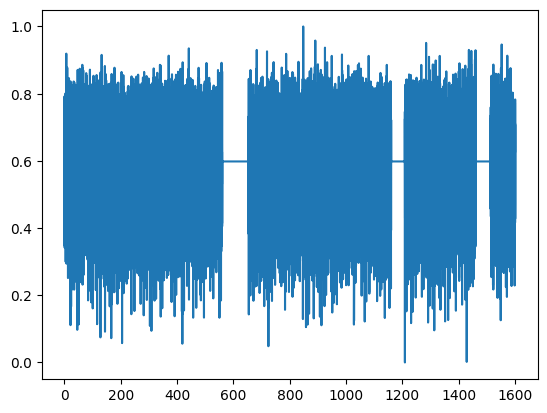

In [67]:
plt.plot(time, flux)

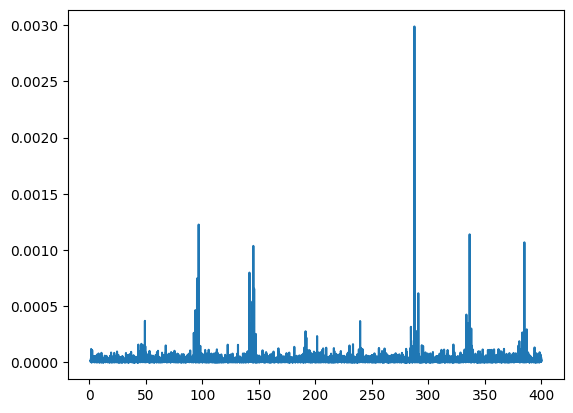

In [62]:
w1 = np.linspace(1, 400, 5000)
power = LombScargle(time, flux).power(w1)
plt.plot(w1, power[:,None])
plt.show()